In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import sys, os
this_path = '/home/ibi/Documents/GitHub/mas291-project/'
sys.path.append(this_path)
os.chdir(this_path)
print(os.getcwd())

/home/ibi/Documents/GitHub/mas291-project


In [32]:
chicago_data = pd.read_csv('data/cleaned/new_york_sample.csv')
chicago_data.head()

,data_source,id,post_link,list_date,sold_date,days_until_sold,price,address,status,area,bedrooms,bathrooms,latitude,longitude,community_area
0,https://www.realtor.com/,4621132764,https://www.realtor.com/realestateandhomes-det...,2024-02-27,2024-07-03,127.0,669888.0,"319 Green Valley Rd, Staten Island, Ny 10312",SOLD,1614.0,3.0,2.0,40.549982,-74.193644,503
1,https://www.realtor.com/,3436380921,https://www.realtor.com/realestateandhomes-det...,2024-03-15,2024-07-03,110.0,680000.0,"491 Doane Ave, Staten Island, Ny 10308",SOLD,1439.0,3.0,3.5,40.562004,-74.157873,503
2,https://www.realtor.com/,3444021662,https://www.realtor.com/realestateandhomes-det...,2023-10-17,2024-07-02,259.0,1188000.0,"531 Richard Ave, Staten Island, Ny 10309",SOLD,2700.0,4.0,2.5,40.505013,-74.223502,503
3,https://www.realtor.com/,4352586863,https://www.realtor.com/realestateandhomes-det...,2024-03-06,2024-07-02,118.0,719900.0,"24 Peter Ave, Staten Island, Ny 10306",SOLD,1152.0,3.0,1.0,40.566206,-74.123706,503
4,https://www.realtor.com/,3456075801,https://www.realtor.com/realestateandhomes-det...,2024-05-02,2024-07-01,60.0,805000.0,"14 Apricot Ct, Staten Island, Ny 10309",SOLD,1440.0,3.0,3.5,40.542468,-74.222583,503


We will choose area for the input and price for the output. So $x$ = area and $y$ = price. 

In [33]:
x = chicago_data['area'].values
y = chicago_data['price'].values

The scatter plot of the data is shown below.

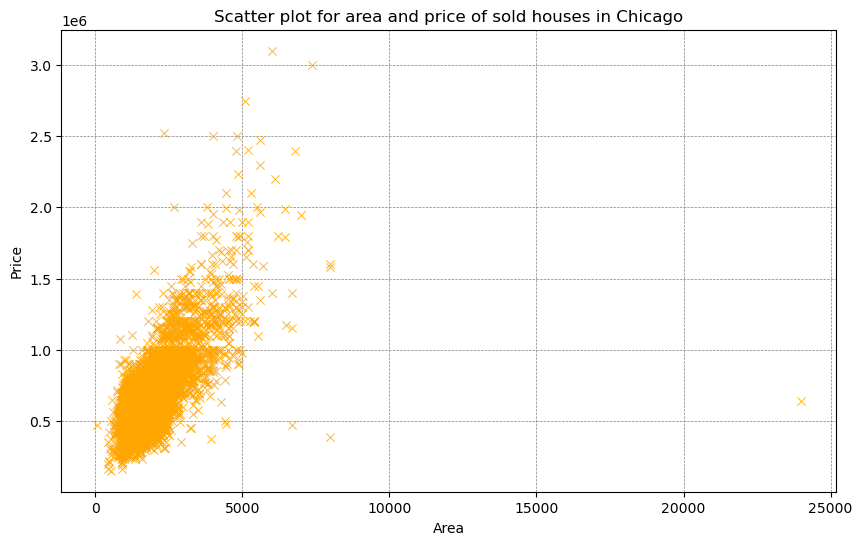

In [34]:
plt.figure(figsize=(10, 6))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', zorder=0)
plt.scatter(x, y, alpha=0.8, color='orange', zorder=3, marker='x', linewidths=0.7)  # Adjusted line width with linewidths=0.5
plt.title('Scatter plot for area and price of sold houses in Chicago')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

The scatter plot shows that the price of the house increases with the area of the house. But we need to know whether they are really related or not, so we can calculate the correlation coefficient. The correlation coefficient is a value that ranges from -1 to 1. The closer the value is to 1, the stronger the positive correlation. The closer the value is to -1, the stronger the negative correlation. The closer the value is to 0, the weaker the correlation.

To calculate the correlation coefficient, we will follow these steps:
1. Calculate the mean of $x$ and $y$.
2. Calculate the deviation from the mean for each $x$ and $y$.
3. Calculate the covariance of $x$ and $y$.
4. Calculate the standard deviation of $x$ and $y$.
5. Calculate the correlation coefficient.

Step 1: Calculate the mean of $x$ and $y$.
$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
$$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$$

In [35]:
# n = len(x)
# sum_x = sum(x)
# sum_y = sum(y)
# mean_x = sum_x / n
# mean_y = sum_y / n

mean_x = np.mean(x).round(2)
mean_y = np.mean(y).round(2)

print(f"Mean of x: {mean_x:.2f}")
print(f"Mean of y: {mean_y:.2f}")

Mean of x: 1869.78
Mean of y: 677026.90


Step 2: Calculate the deviation from the mean for each $x$ and $y$, ($x_i - \bar{x}$) and ($y_i - \bar{y}$).

In [36]:
deviation_x = x - mean_x
deviation_y = y - mean_y

Step 3: Calculate the covariance of $x$ and $y$.
$$cov(x, y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

In [37]:
# covariance = sum(deviation_x * deviation_y) / n

covariance = np.cov(x, y)[0][1]

print(f"Covariance: {covariance:.2f}")

Covariance: 150120789.49


Step 4: Calculate the standard deviation of $x$ and $y$.
$$\sigma_x = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$
$$\sigma_y = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [38]:
# std_deviation_x = (sum(deviation_x ** 2) / n) ** 0.5
# std_deviation_y = (sum(deviation_y ** 2) / n) ** 0.5

std_deviation_x = np.std(x).round(2)
std_deviation_y = np.std(y).round(2)

print(f"Standard deviation of x: {std_deviation_x:.2f}")
print(f"Standard deviation of y: {std_deviation_y:.2f}")

Standard deviation of x: 861.74
Standard deviation of y: 250656.44


Step 5: Calculate the correlation coefficient.
$$r = \frac{cov(x, y)}{\sigma_x \sigma_y}$$

In [39]:
# correlation = covariance / (std_deviation_x * std_deviation_y)

correlation = np.corrcoef(x, y)[0][1]

print(f"Correlation: {correlation:.2f}")

Correlation: 0.69


The correlation coefficient of the area and price is 0.69, indicating a strong positive correlation between the two variables.

To find the regression line, we assume that the relationship between the area and price is linear. The regression line is given by:
$$ \text{price} = w_\text{area} \times \text{area} + b$$
where $w_{area}$ is the weight of the area and $b$ is the bias.

The weight determines the influence of the area on the price, and the bias is the price when the area is zero.

Fitting the regression line to the data means that we agree on some measure of error. The most common measure of error is the squared error. The squared error is the square of the difference between the actual price and the predicted price. The goal is to minimize the squared error. Let $\widehat{\text{price}}$ be the predicted price. The squared error is given by:
$$ \text{error} = \dfrac{1}{2}(\text{price} - \widehat{\text{price}})^2$$

The square of the difference is used to make the error positive, and also to penalize large errors more than small errors. The factor of $\dfrac{1}{2}$ is used to make the derivative of the error simpler.

To measure the error of the regression line, we use the mean squared error (MSE). The MSE is the average of the squared errors. The MSE is given by:
$$ \text{MSE} = \dfrac{1}{n} \sum_{i=1}^{n} \dfrac{1}{2}(\text{price}_i - \widehat{\text{price}}_i)^2$$

The goal is to find the weight and bias that minimize the MSE. To do this, we use the gradient descent algorithm. The gradient descent algorithm is an optimization algorithm that minimizes the error by updating the weight and bias in the opposite direction of the gradient of the error. In each iteration, we update the weight and bias using the following formulas:
$$ w_{area} = w_{area} - \alpha \dfrac{\partial \text{MSE}}{\partial w_{area}}$$
$$ b = b - \alpha \dfrac{\partial \text{MSE}}{\partial b}$$
where $\alpha$ is the learning rate, which determines the step size of the update.

The partial derivative of the MSE with respect to the weight and bias is given by:
$$ \dfrac{\partial \text{MSE}}{\partial w_{area}} = -\dfrac{1}{n} \sum_{i=1}^{n} (price_i - \widehat{price}_i) \times area_i$$
$$ \dfrac{\partial \text{MSE}}{\partial b} = -\dfrac{1}{n} \sum_{i=1}^{n} (price_i - \widehat{price}_i)$$

The gradient descent algorithm is an iterative algorithm that updates the weight and bias until the error converges to a minimum. The algorithm is given by:
1. Initialize the weight and bias to random values.
2. Calculate the predicted price using the regression line.
3. Calculate the error using the MSE.
4. Update the weight and bias using the gradient descent algorithm.
5. Repeat steps 2-4 until the error converges to a minimum.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_test), len(y_test)

(5244, 5244, 1312, 1312)

In [41]:
# Normalize the input features
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_normalized = (x_train - x_train_mean) / x_train_std

y_train_mean = np.mean(y_train)
y_train_std = np.std(y_train)
y_train_normalized = (y_train - y_train_mean) / y_train_std

In [42]:
def gradient_descent(x_train_normalized, y_train_normalized, learning_rate=0.001, iterations=10000, w_init=0.0, b_init=0.0):
    w = w_init
    b = b_init

    w_history = [w]
    b_history = [b]
    loss_history = []

    def compute_loss(X, y, w, b):
        return np.mean((w * X + b - y) ** 2)

    def compute_gradient(X, y, w, b):
        m = len(y)
        y_pred = w * X + b
        error = y_pred - y
        dw = np.sum(x_train_normalized * error) / m
        db = np.sum(error) / m
        return dw, db

    initial_loss = compute_loss(x_train_normalized, y_train_normalized, w, b)
    loss_history.append(initial_loss)

    for i in range(iterations):
        dw, db = compute_gradient(x_train_normalized, y_train_normalized, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        w_history.append(w)
        b_history.append(b)
        loss = compute_loss(x_train_normalized, y_train_normalized, w, b)
        loss_history.append(loss)

    return w, b, w_history, b_history, loss_history


In [43]:
x_train_normalized = (x_train - x_train.mean()) / x_train.std()
y_train_normalized = (y_train - y_train.mean()) / y_train.std()

w_area, b, w_history, b_history, loss_history = gradient_descent(x_train_normalized, y_train_normalized)

w_area_original = w_area * y_train.std() / x_train.std()
b_original = b * y_train.std() + y_train.mean() - w_area_original * x_train.mean()

print(f"Weight for area (original scale): {w_area_original:.2f}")
print(f"Bias (original scale): {b_original:.2f}")
print(f"Final model: y = {w_area_original:.2f} * x + {b_original:.2f}")

Weight for area (original scale): 193.53
Bias (original scale): 314077.23
Final model: y = 193.53 * x + 314077.23


The regression line is shown below.

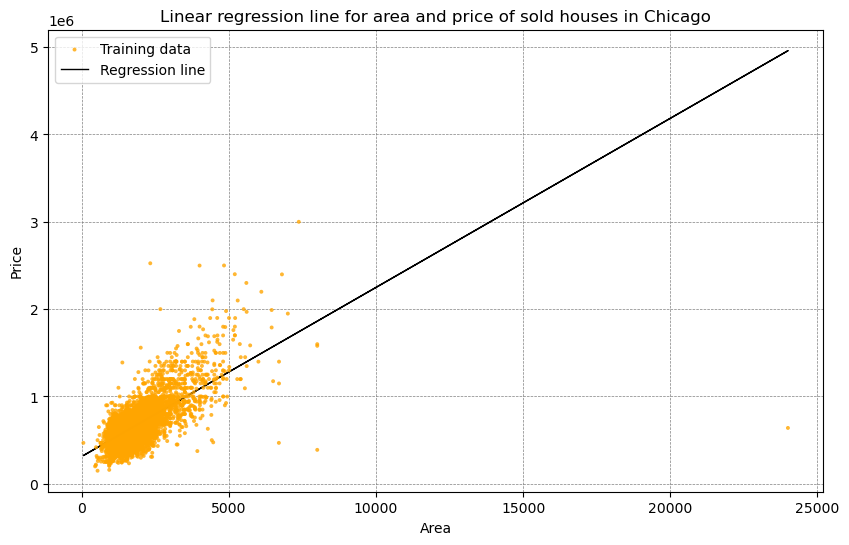

In [44]:
y_pred_train_normalized = w_area * x_train_normalized + b
y_pred_train = y_pred_train_normalized * y_train_std + y_train_mean

plt.figure(figsize=(10, 6))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', zorder=0)
plt.scatter(x_train, y_train, alpha=0.8, s=8, color='orange', edgecolor='none', zorder=3, label='Training data')
plt.plot(x_train, y_pred_train, color='black', linewidth=1, zorder=2, label='Regression line')
plt.title('Linear regression line for area and price of sold houses in Chicago')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

Let's see what the test data looks like.

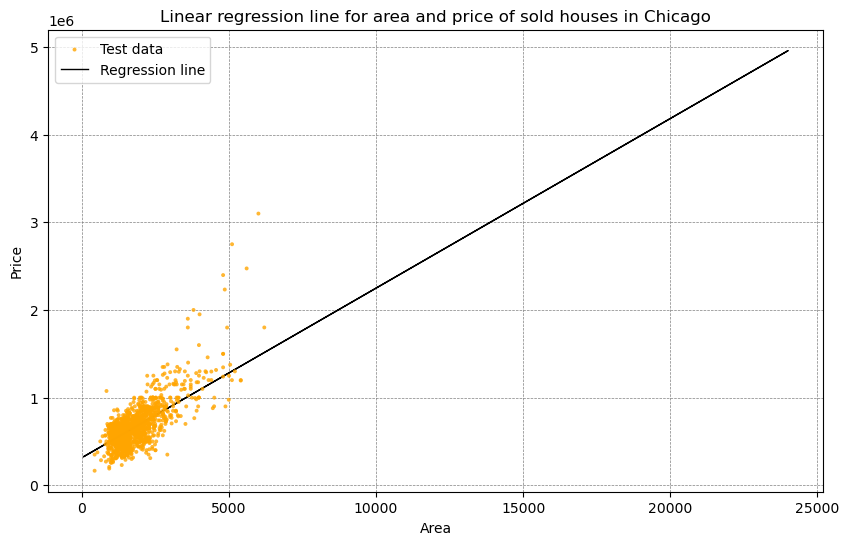

In [45]:
plt.figure(figsize=(10, 6))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', zorder=0)
plt.scatter(x_test, y_test, alpha=0.8, s=8, color='orange', edgecolor='none', zorder=3, label='Test data')
plt.plot(x_train, y_pred_train, color='black', linewidth=1, zorder=2, label='Regression line')
plt.title('Linear regression line for area and price of sold houses in Chicago')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

The accuracy of the model is calculated using the coefficient of determination, $R^2$. The coefficient of determination is a value that ranges from 0 to 1. The closer the value is to 1, the better the model fits the data. The coefficient of determination is given by:
$$ R^2 = 1 - \dfrac{\sum_{i=1}^{n} (price_i - \widehat{price}_i)^2}{\sum_{i=1}^{n} (price_i - \overline{price})^2}$$
where $\overline{price}$ is the mean of the price.

In [46]:
y_pred_test_normalized = w_area * (x_test - x_train_mean) / x_train_std + b
y_pred_test = y_pred_test_normalized * y_train_std + y_train_mean

ssr = np.sum((y_test - y_pred_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - ssr / sst

print(f"R2: {r2:.2f}")

R2: 0.53


The coefficient of determination of the model is 0.53, indicating that the model explains 53% of the variance in the data.

To understand what the model is doing, we can plot the gradient descent surface. The gradient descent surface shows the error as a function of the weight and bias. The goal is to find the weight and bias that minimize the error. The gradient descent surface is shown below.

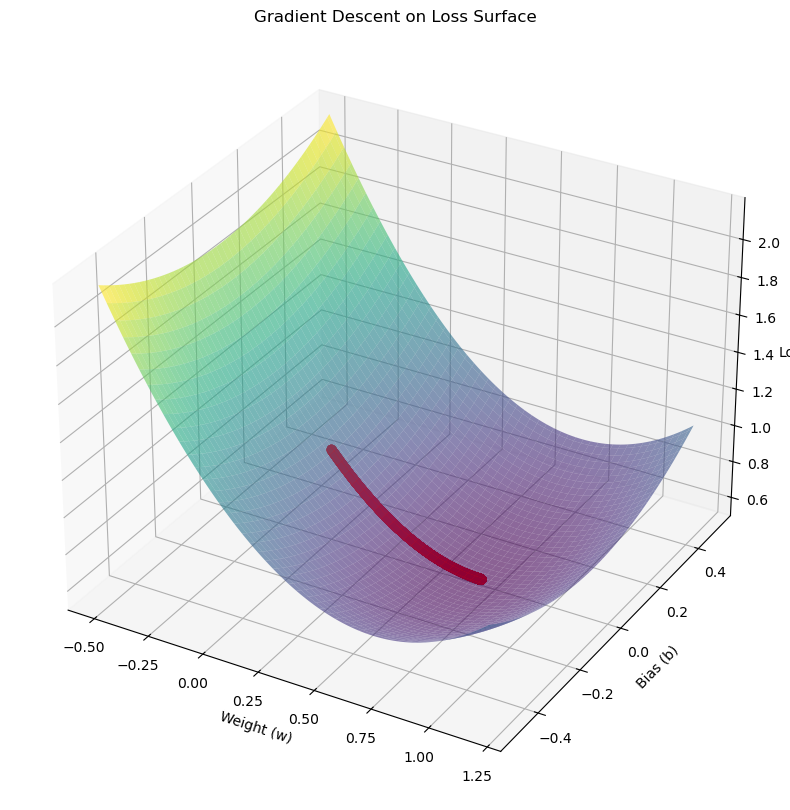

In [47]:
w_grid, b_grid = np.meshgrid(
    np.linspace(min(w_history) - 0.5, max(w_history) + 0.5, 100),
    np.linspace(min(b_history) - 0.5, max(b_history) + 0.5, 100)
)
Z = np.array([
    np.mean((w * x_train_normalized + b - y_train_normalized) ** 2)
    for w, b in zip(np.ravel(w_grid), np.ravel(b_grid))
]).reshape(w_grid.shape)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_grid, b_grid, Z, alpha=0.6, cmap='viridis')
ax.plot(w_history, b_history, [np.mean((w * x_train_normalized + b - y_train_normalized) ** 2) for w, b in zip(w_history, b_history)], 'r-o')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent on Loss Surface')
plt.show()

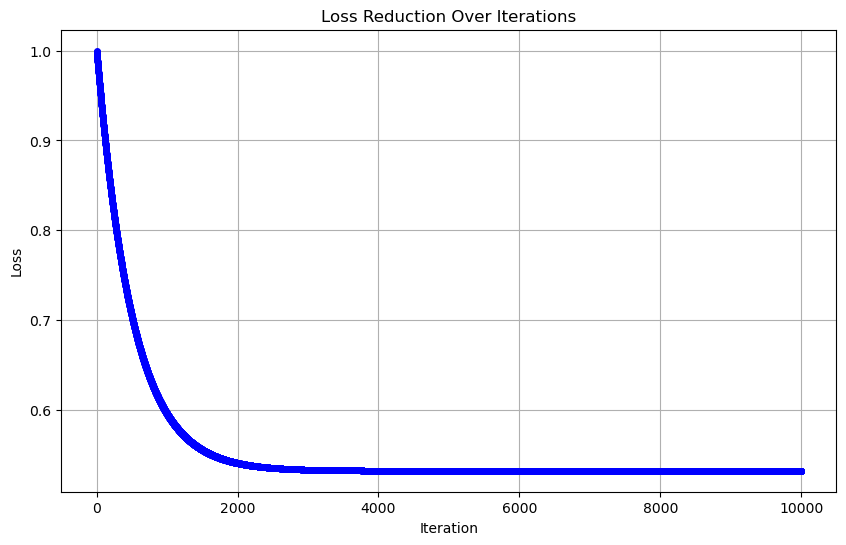

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, 'b-o', markersize=4)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Iterations')
plt.grid(True)
plt.show()
